In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#unsupervise learning: başkasının baktığına örnek alarak önerilenlere benzer ürünleri çıkarmak.

In [3]:
df=pd.read_csv("resources/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df.info(10)
#200 tane alan var 
#hiç boş kayıt yok
#tüm alanlar int. bir alan string(gender)
#customerID alanına gerek yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.describe().T
#transpoz alarak veriler incelenir.
#müşteriler genelde genç ve orta yaşlıdır.

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


<Figure size 1008x360 with 0 Axes>

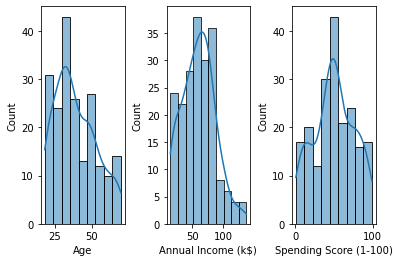

In [6]:
#verilerin dağılım grafikleri:
plt.figure(figsize=(14,5))
fig, ax=plt.subplots(1,3)#bir figür içerisine 3 tane grafik çizmek- bir figürü 3e böler
plt.subplots_adjust(hspace=0.5,wspace=0.5)#grafikler arasındaki boşluklar ayarlanır
#sayısal alanların dağılım grafikleri:
y=0
for col in df.columns[2:]: #2den sonrası sayısal alan o yüzden bunları al
    sns.histplot(data=df, x=col, kde=True, ax=ax[y]) #ax-> her sütunun çizleceği yerleri belirler
    y+=1

<AxesSubplot:xlabel='count', ylabel='Gender'>

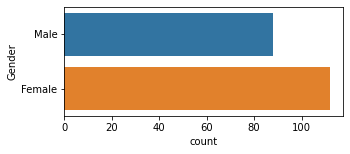

In [8]:
#kaç erkek ve kadın var bar grafikle gösterme:
plt.figure(figsize=(5,2))
sns.countplot(y="Gender",data=df)
#dataframe oluşturmadan kısa yoldan çizme

<AxesSubplot:xlabel='Gender', ylabel='Count'>

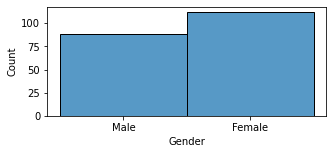

In [21]:
plt.figure(figsize=(5,2))
sns.histplot(data=df,x="Gender")

<Figure size 1008x360 with 0 Axes>

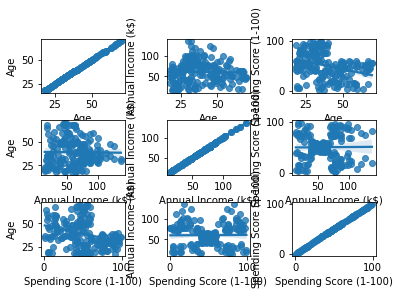

In [9]:
#regplot grafiklerini çizme: ikisi arasında doğrusal bir ilşki var mı bakılır.
plt.figure(figsize=(14,5))
fig, ax=plt.subplots(3,3)
plt.subplots_adjust(hspace=0.5,wspace=0.5)

row=0
for x in df.columns[2:]:
    col=0
    for y in df.columns[2:]:
        sns.regplot(data=df, x=x, y=y, ax=ax[row,col])
        col+=1
    row+=1

<AxesSubplot:>

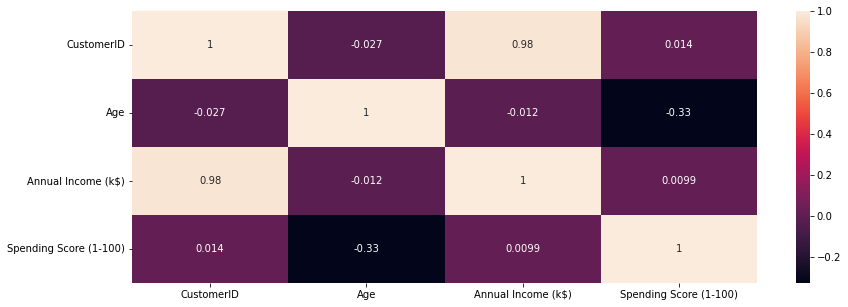

In [23]:
#korelasyon matrisi:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

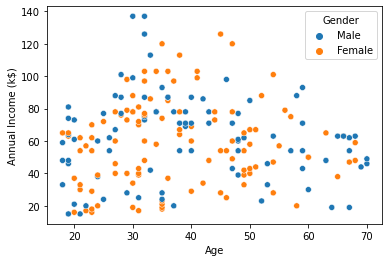

In [11]:
sns.scatterplot(data=df, x="Age",y="Annual Income (k$)",hue="Gender")
#hue-> bu değere göre renklendir. scatterplot ile.

In [12]:
#iki tür öğrenme var: supervise, unsupervise;

#unsupervise:
#Burada çıkış olmaz. y yok
X=df[df.columns[2:]] #girişler
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [24]:
#kümeleme yapılarak verriler ayrılır.
#Kmeans e göre kümeleme yapılır
uzaklik = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42)
    model.fit(X)
    uzaklik.append(model.inertia_)


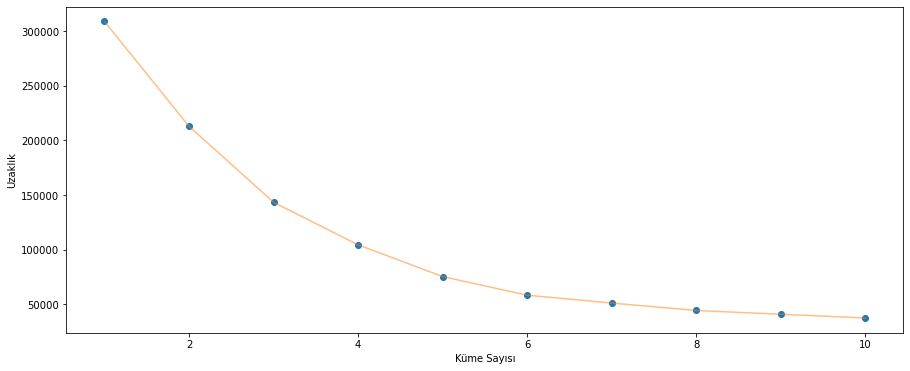

In [14]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , uzaklik , 'o')
plt.plot(np.arange(1 , 11) , uzaklik , '-' , alpha = 0.5)
plt.xlabel('Küme Sayısı') , plt.ylabel('Uzaklık')
plt.show()
#grafiğin dirsek aldığı yere bakarak optimum değer bulunur. burada 4 tür. k=4

In [15]:
#veri dirsek noktasına göre bölünür. k=4:
model = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42 , algorithm='elkan') )
model.fit(X)
new_labels = model.labels_ #her bir veri hangi kümede 
merkezler = model.cluster_centers_ #kümenin merkezi

In [16]:
new_labels

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)